In [96]:
import numpy as np
import pandas as pd
import re

In [11]:
df = pd.read_csv('NutritionalFacts_Fruit_Vegetables_Seafood.csv',encoding='utf-8')

In [14]:
df.iloc[0]

Food and Serving           NaN
Calories                   NaN
Caloriesfrom Fat           NaN
Total Fat                  (g)
Total Fat.1              (%DV)
Sodium                     (g)
Sodium.1                 (%DV)
Potassium                  (g)
Potassium.1              (%DV)
Total Carbo-hydrate        (g)
Total Carbo-hydrate.1    (%DV)
Dietary Fiber              (g)
Dietary Fiber.1          (%DV)
Sugars                     (g)
Protein                    (g)
Vitamin A                (%DV)
Vitamin C                (%DV)
Calcium                  (%DV)
Iron                     (%DV)
Saturated Fat            (%DV)
Saturated Fat.1           (mg)
Chole-sterol             (%DV)
Chole-sterol.1            (mg)
Food Type                  NaN
Name: 0, dtype: object

In [15]:
df.head()

,Food and Serving,Calories,Caloriesfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,NaN,NaN,NaN,(g),(%DV),(g),(%DV),(g),(%DV),(g),...,(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg),(%DV),(mg),NaN
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
4,"Carrot, 1 carrot, 7"" long,1 1/4"" diameter (78 ...",30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."


In [22]:
df = df.drop(index = 0)

In [23]:
df.head()

,Food and Serving,Calories,Caloriesfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
4,"Carrot, 1 carrot, 7"" long,1 1/4"" diameter (78 ...",30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
5,"Cauliflower, 1/6 medium head (99 g/3.5 oz)",25.0,0.0,0,0,30,1,270,8,5,...,2,0,100,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."


In [24]:
df['Food and Serving'] = df['Food and Serving'].apply(lambda x : x.split(',')[0])

In [25]:
df.head()

,Food and Serving,Calories,Caloriesfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
1,Asparagus,20.0,0.0,0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
2,Bell Pepper,25.0,0.0,0,0,40,2,220,6,6,...,1,4,190,2,4,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
3,Broccoli,45.0,0.0,0.5,1,80,3,460,13,8,...,4,6,220,6,6,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
4,Carrot,30.0,0.0,0,0,60,3,250,7,7,...,1,110,10,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."
5,Cauliflower,25.0,0.0,0,0,30,1,270,8,5,...,2,0,100,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/ounce we..."


In [26]:
from googlesearch import search 

In [30]:
query = "orange nutrition value"
  
for j in search(query, tld="co.in", num=10, stop=10, pause=0): 
    print(j) 

http://iranfreshfruit.net/product/orange-fruit
https://en.wikipedia.org/wiki/Orange_(fruit)
https://www.healthline.com/nutrition/foods/oranges
https://www.healthline.com/nutrition/foods/oranges#nutrition
https://www.healthline.com/nutrition/foods/oranges#vitamins-and-minerals
https://www.healthline.com/nutrition/foods/oranges#plant-compounds
https://www.healthline.com/nutrition/foods/oranges#benefits
https://www.medicalnewstoday.com/articles/272782
https://nutritiondata.self.com/facts/fruits-and-fruit-juices/1966/2
https://www.verywellfit.com/oranges-nutrition-facts-calories-and-health-benefits-4119322


In [35]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.nutritionadvance.com/healthy-foods/types-of-fruit/'
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text)
# print("List of all the h1, h2, h3 :")
for heading in soup.find_all([ "h2"]):
    print(heading.name + ' ' + heading.text.strip())

List of all the h1, h2, h3 :
h2 Types of Fruit – A to Z Quick Jump
h2 1. Apple
h2 2. Apricot
h2 3. Avocado
h2 4. Banana
h2 5. Blackberries
h2 6. Blackcurrant
h2 7. Blueberries
h2 8. Boysenberries
h2 9. Capers
h2 10. Cherry
h2 11. Black Chokeberry
h2 12. Cranberry
h2 13. Date Palm
h2 14. Durian
h2 15. Elderberry
h2 16. Goji Berries
h2 17. Golden Berries
h2 18. Gooseberries
h2 19. Grape
h2 20. Grapefruit
h2 21. Guava
h2 22. Jackfruit
h2 23. Jujube
h2 24. Juniper Berries
h2 25. Kiwi
h2 26. Kumquat
h2 27. Lemon
h2 28. Lime
h2 29. Longan Fruit
h2 30. Lychee
h2 31. Mango
h2 32. Melon
h2 33. Mulberry
h2 34. Olives
h2 35. Orange
h2 36. Papaya
h2 37. Passion Fruit
h2 38. Pear
h2 39. Persimmon
h2 40. Pineapple
h2 41. Plum
h2 42. Pomegranate
h2 43. Rambutan
h2 44. Raspberry
h2 45. Redberries
h2 46. Rhubarb
h2 47. Starfruit
h2 48. Strawberry
h2 49. Tangerine
h2 50. Tomato
h2 51. Ugli Fruit
h2 52. Watermelon


In [38]:
listtags = []
for heading in soup.find_all([ "li"]):
    print(heading.text.strip())
    listtags.append(heading.text.strip())

Foods
Nutrition
About
Contact
Foods
Nutrition
Calories: 104 kcal
Carbohydrate: 27.6 g
Fiber: 2.8 g
Sugar: 21.8 g
Fat: 0.3 g
Protein: 0.6 g
Vitamin C: 14% RDA
Potassium: 6% RDA
Manganese: 4% RDA
Vitamin B6: 4% RDA
Vitamin B2: 4% RDA
Calories: 16.8 kcal
Carbohydrate: 3.9 g
Fiber: 0.7 g
Sugar: 3.2 g
Fat: 0.1 g
Protein: 0.5 g
Vitamin A: 13% RDA
Vitamin C: 6% RDA
Potassium: 3% RDA
Vitamin E: 2% RDA
Phosphorus: 1% RDA
Calories: 322 kcal
Carbohydrate: 17.1 g
Fiber: 13.5 g
Sugar: 0.2 g
Fat: 29.5 g
Protein: 4 g
Vitamin K: 53% RDA
Folate: 41% RDA
Vitamin C: 33% RDA
Potassium: 28% RDA
Vitamin B5: 28% RDA
Calories: 105 kcal
Carbohydrate: 27.0 g
Fiber: 3.1 g
Sugar: 14.4 g
Fat: 0.4 g
Protein: 1.3 g
Vitamin B6: 22% RDA
Vitamin C: 17% RDA
Manganese: 16% RDA
Potassium: 12% RDA
Magnesium: 8% RDA
Calories: 43 kcal
Carbohydrate: 10.2 g
Fiber: 5.3 g
Sugar: 4.9 g
Fat: 0.5 g
Protein: 1.4 g
Vitamin C: 35% RDA
Manganese: 32% RDA
Vitamin K: 25% RDA
Copper: 8% RDA
Vitamin E: 6% RDA
Calories: 63 kcal
Carbohydrate

In [39]:
len(listtags)

569

In [43]:
listtags[6]

'Calories: 104 kcal'

In [50]:
listags = listtags[6:-6]

In [51]:
len(listags)

557

In [52]:
listags
        
    

['Calories: 104 kcal',
 'Carbohydrate: 27.6 g',
 'Fiber: 2.8 g',
 'Sugar: 21.8 g',
 'Fat: 0.3 g',
 'Protein: 0.6 g',
 'Vitamin C: 14% RDA',
 'Potassium: 6% RDA',
 'Manganese: 4% RDA',
 'Vitamin B6: 4% RDA',
 'Vitamin B2: 4% RDA',
 'Calories: 16.8 kcal',
 'Carbohydrate: 3.9 g',
 'Fiber: 0.7 g',
 'Sugar: 3.2 g',
 'Fat: 0.1 g',
 'Protein: 0.5 g',
 'Vitamin A: 13% RDA',
 'Vitamin C: 6% RDA',
 'Potassium: 3% RDA',
 'Vitamin E: 2% RDA',
 'Phosphorus: 1% RDA',
 'Calories: 322 kcal',
 'Carbohydrate: 17.1 g',
 'Fiber: 13.5 g',
 'Sugar: 0.2 g',
 'Fat: 29.5 g',
 'Protein: 4 g',
 'Vitamin K: 53% RDA',
 'Folate: 41% RDA',
 'Vitamin C: 33% RDA',
 'Potassium: 28% RDA',
 'Vitamin B5: 28% RDA',
 'Calories: 105 kcal',
 'Carbohydrate: 27.0 g',
 'Fiber: 3.1 g',
 'Sugar: 14.4 g',
 'Fat: 0.4 g',
 'Protein: 1.3 g',
 'Vitamin B6: 22% RDA',
 'Vitamin C: 17% RDA',
 'Manganese: 16% RDA',
 'Potassium: 12% RDA',
 'Magnesium: 8% RDA',
 'Calories: 43 kcal',
 'Carbohydrate: 10.2 g',
 'Fiber: 5.3 g',
 'Sugar: 4.9 g',


In [142]:
temp = '$'.join(listags)

In [143]:
temp = temp.split('Calories')

In [144]:
del(temp[0])

In [145]:
for i in range(len(temp)):
    temp[i] = 'Calories' + temp[i]
    temp[i] = temp[i].split('$')[:-1]

In [69]:
foodlist = []
for heading in soup.find_all([ "h2"]):
    foodlist.append(heading.text.strip())
    

In [71]:
del(foodlist[0])

In [73]:
del(foodlist[23])

In [76]:
for i in range(len(foodlist)):
    foodlist[i] = foodlist[i].split('. ')[1]

In [77]:
foodlist

['Apple',
 'Apricot',
 'Avocado',
 'Banana',
 'Blackberries',
 'Blackcurrant',
 'Blueberries',
 'Boysenberries',
 'Capers',
 'Cherry',
 'Black Chokeberry',
 'Cranberry',
 'Date Palm',
 'Durian',
 'Elderberry',
 'Goji Berries',
 'Golden Berries',
 'Gooseberries',
 'Grape',
 'Grapefruit',
 'Guava',
 'Jackfruit',
 'Jujube',
 'Kiwi',
 'Kumquat',
 'Lemon',
 'Lime',
 'Longan Fruit',
 'Lychee',
 'Mango',
 'Melon',
 'Mulberry',
 'Olives',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Pear',
 'Persimmon',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Rambutan',
 'Raspberry',
 'Redberries',
 'Rhubarb',
 'Starfruit',
 'Strawberry',
 'Tangerine',
 'Tomato',
 'Ugli Fruit',
 'Watermelon']

In [78]:
len(foodlist)

51

In [140]:
# for i in range(len(temp)):
#     for j in range(len(temp[i])) :
#         if type(temp[i][j])==list:
#             temp[i][j] = temp[i][j][0]

In [150]:
for i in range(len(temp)):
    for j in range(len(temp[i])) :
        temp[i][j] = temp[i][j].split(':')

In [151]:
temp

[[['Calories', ' 104 kcal'],
  ['Carbohydrate', ' 27.6 g'],
  ['Fiber', ' 2.8 g'],
  ['Sugar', ' 21.8 g'],
  ['Fat', ' 0.3 g'],
  ['Protein', ' 0.6 g'],
  ['Vitamin C', ' 14% RDA'],
  ['Potassium', ' 6% RDA'],
  ['Manganese', ' 4% RDA'],
  ['Vitamin B6', ' 4% RDA'],
  ['Vitamin B2', ' 4% RDA']],
 [['Calories', ' 16.8 kcal'],
  ['Carbohydrate', ' 3.9 g'],
  ['Fiber', ' 0.7 g'],
  ['Sugar', ' 3.2 g'],
  ['Fat', ' 0.1 g'],
  ['Protein', ' 0.5 g'],
  ['Vitamin A', ' 13% RDA'],
  ['Vitamin C', ' 6% RDA'],
  ['Potassium', ' 3% RDA'],
  ['Vitamin E', ' 2% RDA'],
  ['Phosphorus', ' 1% RDA']],
 [['Calories', ' 322 kcal'],
  ['Carbohydrate', ' 17.1 g'],
  ['Fiber', ' 13.5 g'],
  ['Sugar', ' 0.2 g'],
  ['Fat', ' 29.5 g'],
  ['Protein', ' 4 g'],
  ['Vitamin K', ' 53% RDA'],
  ['Folate', ' 41% RDA'],
  ['Vitamin C', ' 33% RDA'],
  ['Potassium', ' 28% RDA'],
  ['Vitamin B5', ' 28% RDA']],
 [['Calories', ' 105 kcal'],
  ['Carbohydrate', ' 27.0 g'],
  ['Fiber', ' 3.1 g'],
  ['Sugar', ' 14.4 g'],
  ['F

In [152]:
a = temp[1].copy()

In [153]:
a

[['Calories', ' 16.8 kcal'],
 ['Carbohydrate', ' 3.9 g'],
 ['Fiber', ' 0.7 g'],
 ['Sugar', ' 3.2 g'],
 ['Fat', ' 0.1 g'],
 ['Protein', ' 0.5 g'],
 ['Vitamin A', ' 13% RDA'],
 ['Vitamin C', ' 6% RDA'],
 ['Potassium', ' 3% RDA'],
 ['Vitamin E', ' 2% RDA'],
 ['Phosphorus', ' 1% RDA']]

In [159]:
df = pd.DataFrame()
for i in range(len(temp)):
    di = {}
    di['name'] = foodlist[i]
    a = temp[i]
    print('i=',i)
    for j in range(len(a)):
        print('j=',j)
        try:
            di[a[j][0]] = float(re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?"
                                      ,a[j][1])[0])
        except:
            pass
    df = df.append(di,ignore_index=True)


i= 0
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 1
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 2
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 3
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 4
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 5
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 6
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 7
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 8
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 9
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 10
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 11
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 12
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 13
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 14
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 15
j= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
i= 16
j= 0
j= 1
j=

In [158]:
temp[5]

[['Calories', ' 63 kcal'],
 ['Carbohydrate', ' 15.4 g'],
 ['Fiber', ' –'],
 ['Sugar', ' –'],
 ['Fat', ' 0.4 g'],
 ['Protein', ' 1.4 g'],
 ['Vitamin C', ' 302% RDA'],
 ['Manganese', ' 13% RDA'],
 ['Potassium', ' 9% RDA'],
 ['Iron', ' 9% RDA'],
 ['Magnesium', ' 6% RDA']]

In [160]:
df.head()

,Calories,Carbohydrate,Fat,Fiber,Manganese,Potassium,Protein,Sugar,Vitamin B2,Vitamin B6,...,Vitamin B5,Vitamin K,Magnesium,Copper,Iron,Vitamin B1,Selenium,Vitamin B3,Calcium,Sodium
0,104.0,27.6,0.3,2.8,4.0,6.0,0.6,21.8,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16.8,3.9,0.1,0.7,NaN,3.0,0.5,3.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,322.0,17.1,29.5,13.5,NaN,28.0,4.0,0.2,NaN,NaN,...,28.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,105.0,27.0,0.4,3.1,16.0,12.0,1.3,14.4,NaN,22.0,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43.0,10.2,0.5,5.3,32.0,NaN,1.4,4.9,NaN,NaN,...,NaN,25.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Calories      51 non-null     float64
 1   Carbohydrate  51 non-null     float64
 2   Fat           51 non-null     float64
 3   Fiber         48 non-null     float64
 4   Manganese     26 non-null     float64
 5   Potassium     35 non-null     float64
 6   Protein       51 non-null     float64
 7   Sugar         44 non-null     float64
 8   Vitamin B2    6 non-null      float64
 9   Vitamin B6    15 non-null     float64
 10  Vitamin C     47 non-null     float64
 11  name          51 non-null     object 
 12  Phosphorus    2 non-null      float64
 13  Vitamin A     19 non-null     float64
 14  Vitamin E     10 non-null     float64
 15  Folate        11 non-null     float64
 16  Vitamin B5    3 non-null      float64
 17  Vitamin K     16 non-null     float64
 18  Magnesium     10 non-null     fl

In [162]:
df.columns

Index(['Calories', 'Carbohydrate', 'Fat', 'Fiber', 'Manganese', 'Potassium',
       'Protein', 'Sugar', 'Vitamin B2', 'Vitamin B6', 'Vitamin C', 'name',
       'Phosphorus', 'Vitamin A', 'Vitamin E', 'Folate', 'Vitamin B5',
       'Vitamin K', 'Magnesium', 'Copper', 'Iron', 'Vitamin B1', 'Selenium',
       'Vitamin B3', 'Calcium', 'Sodium'],
      dtype='object')

In [ ]:
remove = ['Calories', 'Carbohydrate', 'Fat', 'Fiber', 'Manganese', 'Potassium',
       'Protein', 'Sugar', 'Vitamin B2', 'Vitamin B6', 'Vitamin C', 'name',
       'Phosphorus', 'Vitamin A', 'Vitamin E', 'Folate', 'Vitamin B5',
       'Vitamin K', 'Magnesium', 'Copper', 'Iron', 'Vitamin B1', 'Selenium',
       'Vitamin B3', 'Calcium', 'Sodium']

In [163]:
remove = ['Vitamin B2',
       'Phosphorus', 'Folate', 'Vitamin B5', 'Vitamin B1', 'Selenium',
       'Vitamin B3', 'Calcium', 'Sodium']

In [164]:
df.drop(remove,axis= 1,inplace = True)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Calories      51 non-null     float64
 1   Carbohydrate  51 non-null     float64
 2   Fat           51 non-null     float64
 3   Fiber         51 non-null     float64
 4   Manganese     26 non-null     float64
 5   Potassium     35 non-null     float64
 6   Protein       51 non-null     float64
 7   Sugar         44 non-null     float64
 8   Vitamin B6    15 non-null     float64
 9   Vitamin C     47 non-null     float64
 10  name          51 non-null     object 
 11  Vitamin A     19 non-null     float64
 12  Vitamin E     10 non-null     float64
 13  Vitamin K     16 non-null     float64
 14  Magnesium     10 non-null     float64
 15  Copper        22 non-null     float64
 16  Iron          11 non-null     float64
dtypes: float64(16), object(1)
memory usage: 6.9+ KB


In [277]:
df.to_csv('data.csv',index=False)

In [171]:
df['name'] = df['name'].apply(lambda x : x.lower())

In [187]:
# df.loc[df['Fiber'].isnull(),'Fiber']=5

In [194]:
df = df.replace(np.nan,0)

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df[df['name'] == 'apple'][macronutrients].values

array([[104. ,  27.6,   0.3,   2.8,   0.6]])

In [217]:
d_banana = {}
for i in df.columns:
    if i == 'name':
        continue
    ans = float(input('insert '+ i))
    d_banana[i] = ans

insert Calories89
insert Carbohydrate23
insert Fat0.3
insert Fiber2.6
insert Manganese6
insert Potassium10
insert Protein1.1
insert Sugar12
insert Vitamin B60
insert Vitamin C14
insert Vitamin A1
insert Vitamin E0
insert Vitamin K0
insert Magnesium6
insert Copper0
insert Iron1


In [218]:
d_banana['name'] = 'banana'

In [174]:
df.columns

Index(['Calories', 'Carbohydrate', 'Fat', 'Fiber', 'Manganese', 'Potassium',
       'Protein', 'Sugar', 'Vitamin B6', 'Vitamin C', 'name', 'Vitamin A',
       'Vitamin E', 'Vitamin K', 'Magnesium', 'Copper', 'Iron'],
      dtype='object')

In [202]:
macronutrients = ['Calories', 'Carbohydrate', 'Fat','Protein']
micronutrients = ['Manganese', 'Potassium','Vitamin B6', 'Vitamin C','Vitamin A',
       'Vitamin E', 'Vitamin K', 'Magnesium', 'Copper', 'Iron']

In [220]:
df = df.append(d_banana,ignore_index=True)

In [222]:
df['Calories'] = df['Calories'].apply(lambda x:x/2)

In [231]:
fruit_list = input('Enter Fruits Separated by space')
try :
    fruit_list = fruit_list.split(' ')
    food_list = [x.lower() for x in fruit_list]
except:
    food_list = [fruit_list]

Enter Fruits Separated by spaceapple banana


In [232]:
food_list

['apple', 'banana']

In [251]:
food_list = ['apple']

In [252]:
final = df[df['name'].isin(food_list)].sum()

[]

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


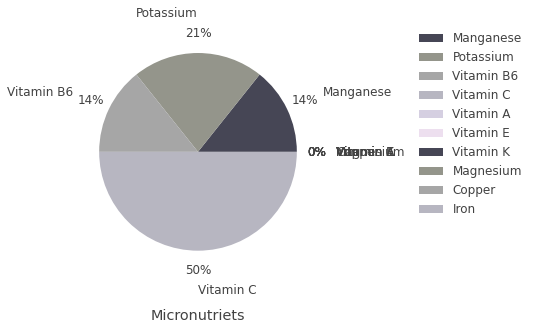

In [280]:
### Macro
labels = micronutrients
percentages = final[micronutrients].values
fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#424242'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
ax.pie(percentages, labels=labels,  
       colors=color_palette_list2, autopct='%1.000f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
# ax.set_title("Elephant in the Valley Survey Respondent Make-up")
ax.legend(frameon=False, bbox_to_anchor=(1.5,1.1))
plt.title('Micronutriets',y = -0.3)
plt.plot()

In [275]:
### Fresh

Enter Fruits Separated by spaceapple bana


[]

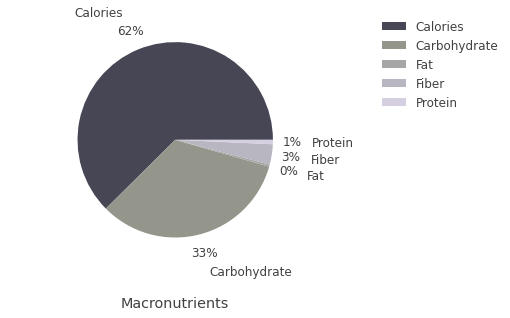

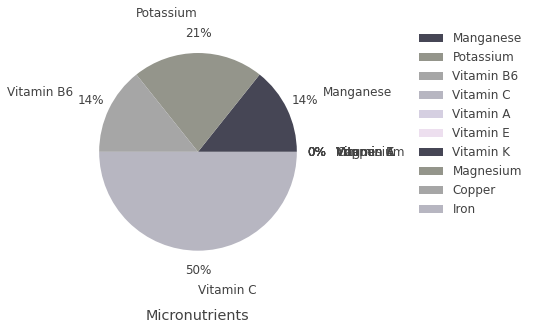

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
color_palette_list2 = ['#464655','#94958b','#a6a6a6','#b7b6c1','#d5cfe1','#eddfef']

df = pd.read_csv('data.csv')

fruit_list = input('Enter Fruits Separated by a space ')
try :
    fruit_list = fruit_list.split(' ')
    food_list = [x.lower() for x in fruit_list]
except:
    food_list = [fruit_list]
    
final = df[df['name'].isin(food_list)].sum()



### Macro
labels = macronutrients
percentages = final[macronutrients].values
fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#424242'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
ax.pie(percentages, labels=labels,  
       colors=color_palette_list2, autopct='%1.000f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
# ax.set_title("Elephant in the Valley Survey Respondent Make-up")
ax.legend(frameon=False, bbox_to_anchor=(1.5,1.1))
plt.title('Macronutrients',y = -0.3)
plt.plot()



labels = micronutrients
percentages = final[micronutrients].values
fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#424242'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
ax.pie(percentages, labels=labels,  
       colors=color_palette_list2, autopct='%1.000f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
# ax.set_title("Elephant in the Valley Survey Respondent Make-up")
ax.legend(frameon=False, bbox_to_anchor=(1.5,1.1))
plt.title('Micronutrients',y = -0.3)
plt.plot()